# Lesson 6 - Starter Code

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# read in the mammal dataset
wd = '../../assets/dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

### Explore our mammals dataset

In [42]:
mammals

name         genus     vore            order  \
1                       Owl monkey         Aotus     omni         Primates   
3       Greater short-tailed shrew       Blarina     omni     Soricomorpha   
4                              Cow           Bos    herbi     Artiodactyla   
8                              Dog         Canis    carni        Carnivora   
9                         Roe deer     Capreolus    herbi     Artiodactyla   
10                            Goat         Capri    herbi     Artiodactyla   
11                      Guinea pig         Cavis    herbi         Rodentia   
13                      Chinchilla    Chinchilla    herbi         Rodentia   
14                 Star-nosed mole     Condylura     omni     Soricomorpha   
15       African giant pouched rat    Cricetomys     omni         Rodentia   
16       Lesser short-tailed shrew     Cryptotis     omni     Soricomorpha   
17            Long-nosed armadillo       Dasypus    carni        Cingulata   
18                      Tree hyrax   Dendrohyrax    herbi       Hyracoidea   
19          North American Opossum     Didelphis     omni  Didelphimorphia   
20                  Asian elephant       Elephas    herbi      Proboscidea   
21                   Big brown bat     Eptesicus  insecti       Chiroptera   
22                           Horse         Equus    herbi   Perissodactyla   
23                          Donkey         Equus    herbi   Perissodactyla   
24               European hedgehog     Erinaceus     omni   Erinaceomorpha   
25                    Patas monkey  Erythrocebus     omni         Primates   
27                    Domestic cat         Felis    carni        Carnivora   
28                          Galago        Galago     omni         Primates   
31                       Gray seal  Haliochoerus    carni        Carnivora   
32                      Gray hyrax   Heterohyrax    herbi       Hyracoidea   
33                           Human          Homo     omni         Primates   
35                African elephant     Loxodonta    herbi      Proboscidea   
37                         Macaque        Macaca     omni         Primates   
39                  Golden hamster  Mesocricetus    herbi         Rodentia   
41                     House mouse           Mus    herbi         Rodentia   
42                Little brown bat        Myotis  insecti       Chiroptera   
44                      Slow loris     Nyctibeus    carni         Primates   
47                          Rabbit   Oryctolagus    herbi       Lagomorpha   
48                           Sheep          Ovis    herbi     Artiodactyla   
49                      Chimpanzee           Pan     omni         Primates   
51                          Jaguar      Panthera    carni        Carnivora   
53                          Baboon         Papio     omni         Primates   
54                 Desert hedgehog   Paraechinus      NaN   Erinaceomorpha   
57                       Phalanger     Phalanger      NaN    Diprotodontia   
61                 Giant armadillo    Priodontes  insecti        Cingulata   
62                      Rock hyrax      Procavia      NaN       Hyracoidea   
63                  Laboratory rat        Rattus    herbi         Rodentia   
65                 Squirrel monkey       Saimiri     omni         Primates   
66           Eastern american mole      Scalopus  insecti     Soricomorpha   
67                      Cotton rat      Sigmodon    herbi         Rodentia   
68                        Mole rat        Spalax      NaN         Rodentia   
69          Arctic ground squirrel  Spermophilus    herbi         Rodentia   
70  Thirteen-lined ground squirrel  Spermophilus    herbi         Rodentia   
72                      Musk shrew        Suncus      NaN     Soricomorpha   
73                             Pig           Sus     omni     Artiodactyla   
74             Short-nosed echidna  Tachyglossus  insecti      Monotremata   
76                 Brazilian tapir       Tapirus    

### Lets check out a scatter plot of body wieght and brain weight

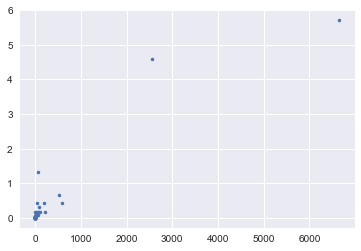

In [6]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()

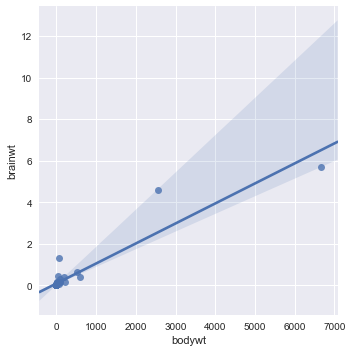

In [7]:
sns.lmplot('bodywt', 'brainwt', mammals)

In [8]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

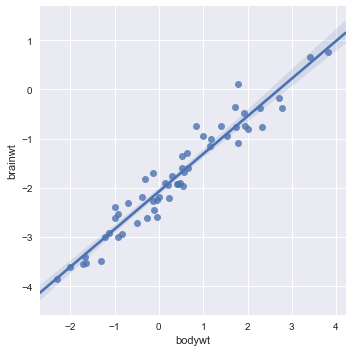

In [9]:
sns.lmplot('bodywt', 'brainwt', log_mammals)

## Guided Practice: Using Seaborn to generate single variable linear model plots (15 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


In [10]:
log_columns = ['bodywt', 'brainwt','sleep_rem','awake']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

##### Complete below for sleep_rem and awake as a y, with variables you've already used as x.


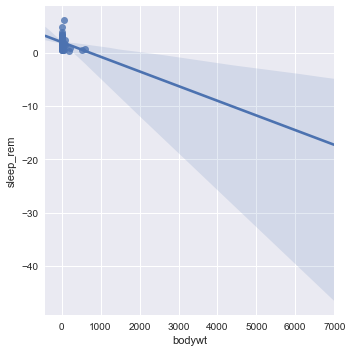

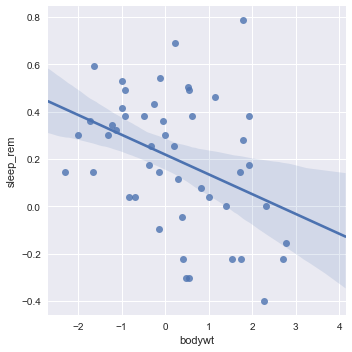

In [11]:
sns.lmplot('bodywt', 'sleep_rem', mammals)
sns.lmplot('bodywt', 'sleep_rem', log_mammals)

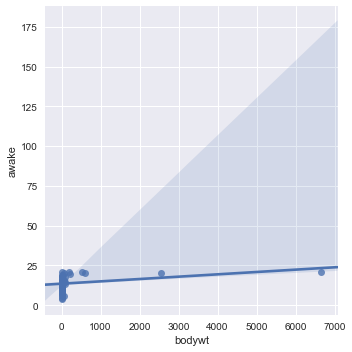

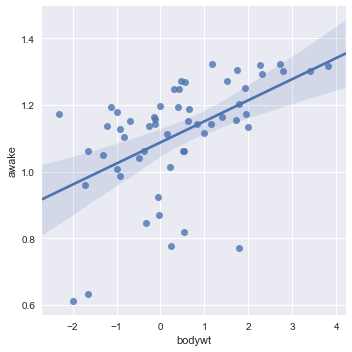

In [12]:
sns.lmplot('bodywt', 'awake', mammals)
sns.lmplot('bodywt', 'awake', log_mammals)

## Introduction: Single Regression Analysis in statsmodels & scikit (10 mins)

In [24]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = mammals['bodywt']
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()
#print the full summary
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Tue, 16 May 2017   Prob (F-statistic):           9.16e-26
Time:                        16:22:34   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use Statsmodels to make the prediction

In [38]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X':[50,100]})
X_new.head()

X
0   50
1  100

In [39]:
lm.predict(X_new)

array([ 0.13411477,  0.18231223])

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals:

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


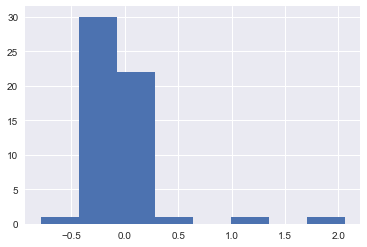

In [41]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=int(np.ceil(np.sqrt(len(y)))))
    # keep the model
    return algo

X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

## Demo: Significance is Key (20 mins)

### What does our output tell us?

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* The model explains, roughly, 87% of the variance of the dataset (the largest errors being in the large brain and body sizes)  
* With this current model, brainwt is roughly bodywt * 0.00096395  
* The residuals, or error in the prediction, is not normal, with outliers on the right. A better model will have similar to normally distributed error.

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [25]:
# prediction at 0?
print lm.predict([[0]])

[ 0.08591731]


P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451
[ 0.]


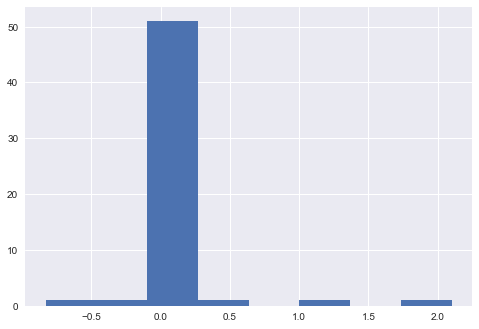

In [26]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print lm.predict([[0]])

## Intrepretation?


Answer: P-value is very small so the result is statistically very significant.

## Guided Practice: Using the LinearRegression object (15 mins)

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. 

Complete the following code to update X and y to match the log-transformed data. 

Complete the loop by setting the list to be one True and one False.

y-intercept: True
P Values: [  3.56282243e-33]
Coefficients: [ 0.76516177]
y-intercept: -2.07393164084
R-Squared: 0.931851615367

y-intercept: False
P Values: [  3.56282243e-33]
Coefficients: [ 0.35561441]
y-intercept: 0.0
R-Squared: -2.41053211437



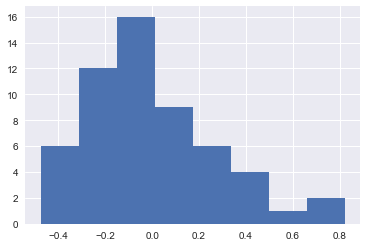

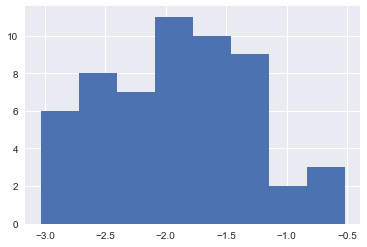

In [43]:
#starter
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']
loop = [True, False]
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

### Which model performed the best? The worst? Why?


Answer: The first model is better. The second model, which does not allow a y-intercept, produces very big errors as indicated in the histogram and negative R-squared. The model basically collapses.

### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.23454772]
y-intercept: -1.85931606304
R-Squared: 0.483728109403

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [  3.56282243e-33]
Coefficients: [ 0.75797972]
y-intercept: -2.07102674342
R-Squared: 0.931769516561

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.39504621]
y-intercept: -1.9242323166
R-Squared: 0.71382228495



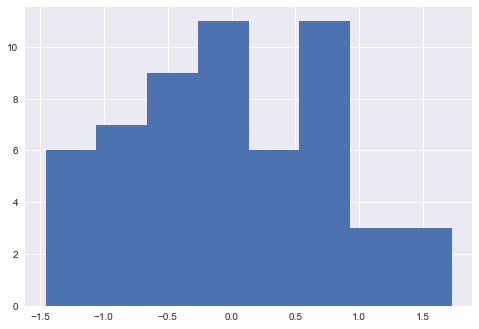

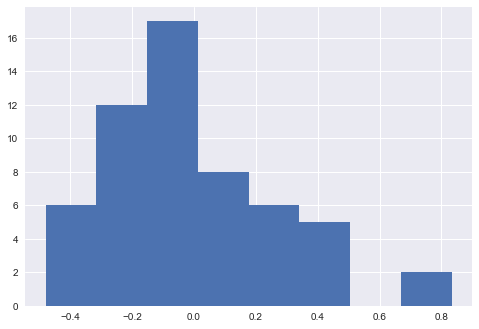

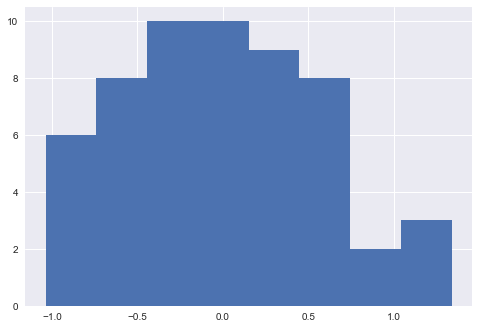

In [33]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print


## Introduction: Multiple Regression Analysis using citi bike data (10 minutes)


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the Y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [138]:
wd = '../../assets/dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head(48)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  2011-01-01       1   0     1   0        0        6           0   
1         2  2011-01-01       1   0     1   1        0        6           0   
2         3  2011-01-01       1   0     1   2        0        6           0   
3         4  2011-01-01       1   0     1   3        0        6           0   
4         5  2011-01-01       1   0     1   4        0        6           0   
5         6  2011-01-01       1   0     1   5        0        6           0   
6         7  2011-01-01       1   0     1   6        0        6           0   
7         8  2011-01-01       1   0     1   7        0        6           0   
8         9  2011-01-01       1   0     1   8        0        6           0   
9        10  2011-01-01       1   0     1   9        0        6           0   
10       11  2011-01-01       1   0     1  10        0        6           0   
11       12  2011-01-01       1   0     1  11        0        6           0   
12       13  2011-01-01       1   0     1  12        0        6           0   
13       14  2011-01-01       1   0     1  13        0        6           0   
14       15  2011-01-01       1   0     1  14        0        6           0   
15       16  2011-01-01       1   0     1  15        0        6           0   
16       17  2011-01-01       1   0     1  16        0        6           0   
17       18  2011-01-01       1   0     1  17        0        6           0   
18       19  2011-01-01       1   0     1  18        0        6           0   
19       20  2011-01-01       1   0     1  19        0        6           0   
20       21  2011-01-01       1   0     1  20        0        6           0   
21       22  2011-01-01       1   0     1  21        0        6           0   
22       23  2011-01-01       1   0     1  22        0        6           0   
23       24  2011-01-01       1   0     1  23        0        6           0   
24       25  2011-01-02       1   0     1   0        0        0           0   
25       26  2011-01-02       1   0     1   1        0        0           0   
26       27  2011-01-02       1   0     1   2        0        0           0   
27       28  2011-01-02       1   0     1   3        0        0           0   
28       29  2011-01-02       1   0     1   4        0        0           0   
29       30  2011-01-02       1   0     1   6        0        0           0   
30       31  2011-01-02       1   0     1   7        0        0           0   
31       32  2011-01-02       1   0     1   8        0        0           0   
32       33  2011-01-02       1   0     1   9        0        0           0   
33       34  2011-01-02       1   0     1  10        0        0           0   
34       35  2011-01-02       1   0     1  11        0        0           0   
35       36  2011-01-02       1   0     1  12        0        0           0   
36       37  2011-01-02       1   0     1  13        0        0           0   
37       38  2011-01-02       1   0     1  14        0        0           0   
38       39  2011-01-02       1   0     1  15        0        0           0   
39       40  2011-01-02       1   0     1  16        0        0           0   
40       41  2011-01-02       1   0     1  17        0        0           0   
41       42  2011-01-02       1   0     1  18        0        0           0   
42       43  2011-01-02       1   0     1  19        0        0           0   
43       44  2011-01-02       1   0     1  20        0        0           0   
44       45  2011-01-02       1   0     1  21        0        0           0   
45       46  2011-01-02       1   0     1  22        0        0           0   
46       47  2011-01-02       1   0     1  23        0        0           0   
47       48  2011-01-03       1   0     1   0        0        1           1   

    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0            1  0.24  0.2879  0.81     0.0000       3      

In [139]:
bike_data.tail(48)

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17331    17332  2012-12-30       1   1    12   0        0        0   
17332    17333  2012-12-30       1   1    12   1        0        0   
17333    17334  2012-12-30       1   1    12   2        0        0   
17334    17335  2012-12-30       1   1    12   3        0        0   
17335    17336  2012-12-30       1   1    12   4        0        0   
17336    17337  2012-12-30       1   1    12   5        0        0   
17337    17338  2012-12-30       1   1    12   6        0        0   
17338    17339  2012-12-30       1   1    12   7        0        0   
17339    17340  2012-12-30       1   1    12   8        0        0   
17340    17341  2012-12-30       1   1    12   9        0        0   
17341    17342  2012-12-30       1   1    12  10        0        0   
17342    17343  2012-12-30       1   1    12  11        0        0   
17343    17344  2012-12-30       1   1    12  12        0        0   
17344    17345  2012-12-30       1   1    12  13        0        0   
17345    17346  2012-12-30       1   1    12  14        0        0   
17346    17347  2012-12-30       1   1    12  15        0        0   
17347    17348  2012-12-30       1   1    12  16        0        0   
17348    17349  2012-12-30       1   1    12  17        0        0   
17349    17350  2012-12-30       1   1    12  18        0        0   
17350    17351  2012-12-30       1   1    12  19        0        0   
17351    17352  2012-12-30       1   1    12  20        0        0   
17352    17353  2012-12-30       1   1    12  21        0        0   
17353    17354  2012-12-30       1   1    12  22        0        0   
17354    17355  2012-12-30       1   1    12  23        0        0   
17355    17356  2012-12-31       1   1    12   0        0        1   
17356    17357  2012-12-31       1   1    12   1        0        1   
17357    17358  2012-12-31       1   1    12   2        0        1   
17358    17359  2012-12-31       1   1    12   3        0        1   
17359    17360  2012-12-31       1   1    12   4        0        1   
17360    17361  2012-12-31       1   1    12   5        0        1   
17361    17362  2012-12-31       1   1    12   6        0        1   
17362    17363  2012-12-31       1   1    12   7        0        1   
17363    17364  2012-12-31       1   1    12   8        0        1   
17364    17365  2012-12-31       1   1    12   9        0        1   
17365    17366  2012-12-31       1   1    12  10        0        1   
17366    17367  2012-12-31       1   1    12  11        0        1   
17367    17368  2012-12-31       1   1    12  12        0        1   
17368    17369  2012-12-31       1   1    12  13        0        1   
17369    17370  2012-12-31       1   1    12  14        0        1   
17370    17371  2012-12-31       1   1    12  15        0        1   
17371    17372  2012-12-31       1   1    12  16        0        1   
17372    17373  2012-12-31       1   1    12  17        0        1   
17373    17374  2012-12-31       1   1    12  18        0        1   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17331           0           2  0.26  0.2576  0.60     0.1642       0   
17332           0           2  0.26  0.2273  0.56     0.4179       1   
17333           0           2  0.26  0.2424  0.56     0.2836       0   
17334           0           2  0.26  0.2273  0.56     0.4179       1   
17335           0           2  0.26  0.2576  0.56     0.2239       0   
17336           0           2  0.26  0.2273  0.48     0.2985       0   
17337           0           2  0.24  0.1970  0.52     0.4179       1   


In [140]:
pd.get_dummies(bike_data['weekday'], prefix='wd', prefix_sep="_")

wd_0  wd_1  wd_2  wd_3  wd_4  wd_5  wd_6
0         0     0     0     0     0     0     1
1         0     0     0     0     0     0     1
2         0     0     0     0     0     0     1
3         0     0     0     0     0     0     1
4         0     0     0     0     0     0     1
5         0     0     0     0     0     0     1
6         0     0     0     0     0     0     1
7         0     0     0     0     0     0     1
8         0     0     0     0     0     0     1
9         0     0     0     0     0     0     1
10        0     0     0     0     0     0     1
11        0     0     0     0     0     0     1
12        0     0     0     0     0     0     1
13        0     0     0     0     0     0     1
14        0     0     0     0     0     0     1
15        0     0     0     0     0     0     1
16        0     0     0     0     0     0     1
17        0     0     0     0     0     0     1
18        0     0     0     0     0     0     1
19        0     0     0     0     0     0     1
20        0     0     0     0     0     0     1
21        0     0     0     0     0     0     1
22        0     0     0     0     0     0     1
23        0     0     0     0     0     0     1
24        1     0     0     0     0     0     0
25        1     0     0     0     0     0     0
26        1     0     0     0     0     0     0
27        1     0     0     0     0     0     0
28        1     0     0     0     0     0     0
29        1     0     0     0     0     0     0
...     ...   ...   ...   ...   ...   ...   ...
17349     1     0     0     0     0     0     0
17350     1     0     0     0     0     0     0
17351     1     0     0     0     0     0     0
17352     1     0     0     0     0     0     0
17353     1     0     0     0     0     0     0
17354     1     0     0     0     0     0     0
17355     0     1     0     0     0     0     0
17356     0     1     0     0     0     0     0
17357     0     1     0     0     0     0     0
17358     0     1     0     0     0     0     0
17359     0     1     0     0     0     0     0
17360     0     1     0     0     0     0     0
17361     0     1     0     0     0     0     0
17362     0     1     0     0     0     0     0
17363     0     1     0     0     0     0     0
17364     0     1     0     0     0     0     0
17365     0     1     0     0     0     0     0
17366     0     1     0     0     0     0     0
17367     0     1     0     0     0     0     0
17368     0     1     0     0     0     0     0
17369     0     1     0     0     0     0     0
17370     0     1     0     0     0     0     0
17371     0     1     0     0     0     0     0
17372     0     1     0     0     0     0     0
17373     0     1     0     0     0     0     0
17374     0     1     0     0     0     0     0
17375     0     1     0     0     0     0     0
17376     0     1     0     0     0     0     0
17377     0     1     0     0     0     0     0
17378     0     1     0     0     0     0     0

[17379 rows x 7 columns]

### What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.755)


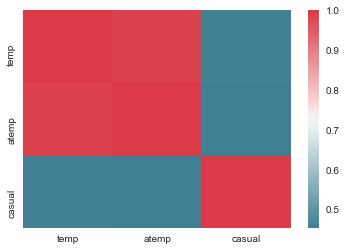

In [141]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### What does the correlation matrix explain?

Answer: Temperature and "felt" temperature are not independent to each other as shown from the high correlation.

## We can measure this effect in the coefficients:



temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



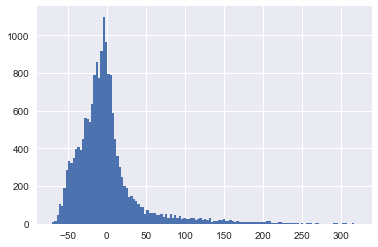

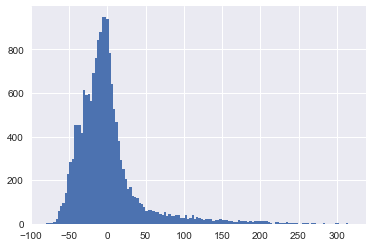

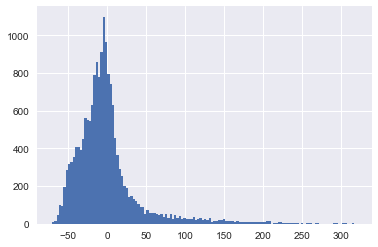

In [142]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation?

Answer: 'Felt' temperature does not help to explain the variance, as expected, because of its non-independent nature to temperature.

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

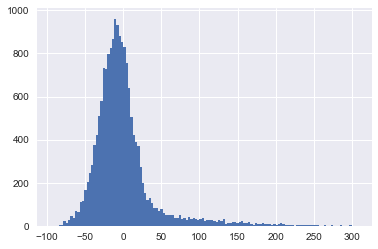

In [143]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

Answer: The coefficients are all the same and so big that they are not physical.

       1  2  3  4
0      1  0  0  0
1      1  0  0  0
2      1  0  0  0
3      1  0  0  0
4      1  0  0  0
5      0  1  0  0
6      1  0  0  0
7      1  0  0  0
8      1  0  0  0
9      1  0  0  0
10     1  0  0  0
11     1  0  0  0
12     1  0  0  0
13     0  1  0  0
14     0  1  0  0
15     0  1  0  0
16     0  1  0  0
17     0  1  0  0
18     0  0  1  0
19     0  0  1  0
20     0  1  0  0
21     0  1  0  0
22     0  1  0  0
23     0  1  0  0
24     0  1  0  0
25     0  1  0  0
26     0  1  0  0
27     0  1  0  0
28     0  1  0  0
29     0  0  1  0
...   .. .. .. ..
17349  0  1  0  0
17350  1  0  0  0
17351  1  0  0  0
17352  1  0  0  0
17353  1  0  0  0
17354  1  0  0  0
17355  1  0  0  0
17356  1  0  0  0
17357  1  0  0  0
17358  1  0  0  0
17359  1  0  0  0
17360  1  0  0  0
17361  1  0  0  0
17362  1  0  0  0
17363  1  0  0  0
17364  0  1  0  0
17365  0  1  0  0
17366  0  1  0  0
17367  0  1  0  0
17368  0  1  0  0
17369  0  1  0  0
17370  0  1  0  0
17371  0  1  0  0
17372  0  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

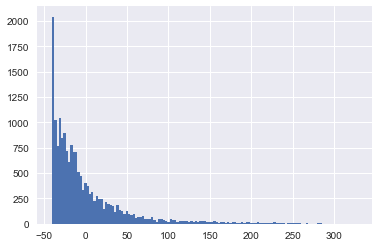

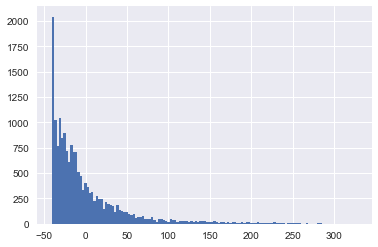

In [144]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

print weather

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print
# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)


### Similar in Statsmodels

In [145]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 17 May 2017   Prob (F-statistic):           1.38e-87
Time:                        20:25:12   Log-Likelihood:                -92198.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                -3.565e+13    4.6e+13     -0.774      0.439     -1.26e+14  5.46e+13
weather[[1, 2, 3, 4]][0]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][1]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][2]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][3]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
==============================================================================
Omnibus:                     8985.326   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58717.202
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      10.537   Cond. No.                     3.46e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [146]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 17 May 2017   Prob (F-statistic):           8.08e-89
Time:                        20:25:12   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer: The irrational result (strange coefficients) from including all dummy variables shows that we must drop one dummy variable because the last remaining variable is not independent to the other variables. In mutually exclusive situation, dummy variables sum up to 1. Multicollinearity can cause problems with models.

## Guided Practice: Combining non-correlated features into a better model (15 mins)

In [147]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   weather_1  weather_2  weather_3  
0          1          0          0  
1          1      

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

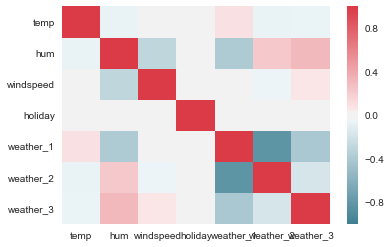

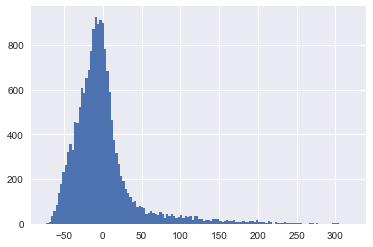

In [148]:
#starter 
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit,prefix='weather')
bikemodel_data = bike_data.join(weather[[0, 1, 2]])  # add in the three weather situations
print bikemodel_data.head()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[['temp','hum','windspeed','holiday','weather_1','weather_2','weather_3']].corr() # what are we getting the correlations of?
correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = ['temp','windspeed','weather_1','weather_2','weather_3'] #[which_variables?] # I choose temp and windspeed.
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

P Values: [  0.00000000e+000   6.25145011e-042   1.57667763e-073   4.65438461e-010
   3.08091550e-101]
Coefficients: [ 1.84910041  0.65502703  0.16614079  0.12531629 -0.16529769]
y-intercept: 0.00359508650179
R-Squared: 0.343731371356


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

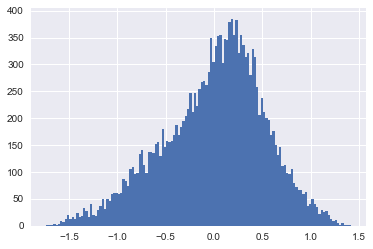

In [149]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)

In [188]:
#Stats models

hour = pd.get_dummies(bike_data.hr,prefix='hour')
#print hour
#bikemodel_data_final = bikemodel_data.join(hour[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]])
bikemodel_data_final = bikemodel_data.join(hour.iloc[:,1:])
print bikemodel_data_final.head()


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit   ...     hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  \
0           1   ...           0        0        0        0        0        0   
1           1   ...           0        0        0        0        0        0   
2           1   ...           0        0        0        0        0        0   
3           1   ...           0        0        0        0        0        0   
4           1   ...           0        0        0        0        0        0   

   hour_20  hour_21  hour_22  hour_23  
0        0

In [185]:
log_y = np.log10(y+1)
lm = smf.ols(formula='log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data_final).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1551.
Date:                Wed, 17 May 2017   Prob (F-statistic):               0.00
Time:                        20:38:29   Log-Likelihood:                -5982.5
No. Observations:               17379   AIC:                         1.203e+04
Df Residuals:                   17349   BIC:                         1.226e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4766      0.198      2.402      0.016         0.088     0.865
temp           1.4479      0.014    103.562      0.000         1.420     1.475
hum           -0.2821      0.018    -16.055      0.000        -0.317    -0.248
windspeed     -0.1573      0.023     -6.937      0.000        -0.202    -0.113
weather_1      0.2877      0.198      1.456      0.145        -0.100     0.675
weather_2      0.2607      0.198      1.319      0.187        -0.127     0.648
weather_3      0.0200      0.198      0.101      0.919        -0.367     0.407
holiday        0.0976      0.016      6.292      0.000         0.067     0.128
hour_1        -0.5141      0.016    -32.806      0.000        -0.545    -0.483
hour_2        -0.6339      0.016    -40.219      0.000        -0.665    -0.603
hour_3        -0.7955      0.016    -49.960      0.000        -0.827    -0.764
hour_4        -0.9012      0.016    -56.490      0.000        -0.933    -0.870
hour_5        -0.8477      0.016    -53.561      0.000        -0.879    -0.817
hour_6        -0.5403      0.016    -34.273      0.000        -0.571    -0.509
hour_7        -0.1941      0.016    -12.363      0.000        -0.225    -0.163
hour_8         0.0666      0.016      4.259      0.000         0.036     0.097
hour_9         0.1457      0.016      9.360      0.000         0.115     0.176
hour_10        0.2280      0.016     14.681      0.000         0.198     0.258
hour_11        0.2823      0.016     18.166      0.000         0.252     0.313
hour_12        0.3061      0.016     19.651      0.000         0.276     0.337
hour_13        0.2966      0.016     18.997      0.000         0.266     0.327
hour_14        0.2964      0.016     18.948      0.000         0.266     0.327
hour_15        0.2925      0.016     18.682      0.000         0.262     0.323
hour_16        0.3021      0.016     19.322      0.000         0.271     0.333
hour_18        0.2624      0.016     16.859      0.000         0.232     0.293
hour_19        0.1824      0.016     11.756      0.000         0.152     0.213
hour_20        0.0846      0.016      5.452      0.000         0.054     0.115
hour_21        0.0172      0.016      1.110      0.267        -0.013     0.048
hour_22       -0.0582      0.016     -3.743      0.000        -0.089    -0.028
hour_23       -0.1798      0.016    -11.547      0.000        -0.210    -0.149
==============================================================================
Omnibus:                       97.694   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.920
Skew:                          -0.157   Prob(JB):                     2.72e-23
Kurtosis:                       3.211   Cond. No.                         229.
==============================================================================

W

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!

I first plot some histograms and scatter plots to have an understanding of how registered riders change with a few variables, especially those categorical ones. I decide to drop season, as it might be potentially multicollinear with month. Same for holiday, which might also be multicollinear with workingday and weekday. I compute the correlations and choose those variables with high correlation with registered riders but are comfortably independent with each other. I choose as many variables as I can to try to maximize the model performance.

I try both log-transforming registered ridership and without it. Performance is better when we log-transform with R-squared=0.737. However, most of the contributions are from the time of the day. If one does not concern about ridership in terms of the hour of the day, all other variables altogether in my model only produce R-squared of 0.263. I also try the gls method in statsmodel, result is the same.

For the questions, distribution is fine, we do not have to rescale the data (How do we rescale data anyway?). I think model stops improving R-squared when we exhaust variables that intuitively correlate with the outcome. Adding more variables that are ridiculous or multicollinear with other variables will not improve the model. Negative ridership is not possible, and no ridership is also not very possible (What are feature values btw? We've got a few categorical variables here which won't be 0?). In my model, the y-intercept is positive, so it looks fine. I think there are times the y-intercept might be negative but the model is not wrong because the model is supposed not to be used when all feature values is 0... Should be careful when that happens.

Hour, season, month, weekday and weather situation are categorical variables so these can become dummy. Other features that can affect ridership include economy indicators (e.g GDP growth), oil price, cost of public transit, traffic, air quality etc

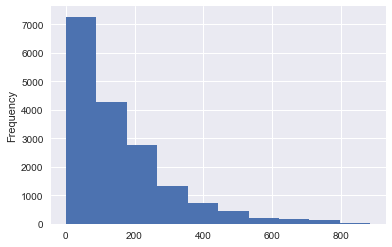

In [211]:
#bikemodel_data_final['casual'].plot(kind="hist")
bikemodel_data_final['registered'].plot(kind="hist")

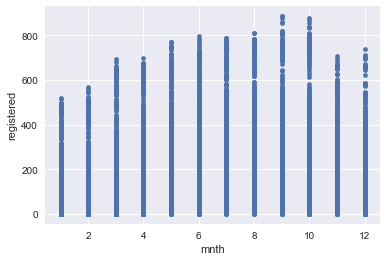

In [212]:
bikemodel_data_final.plot(kind='scatter',x='mnth',y='registered')

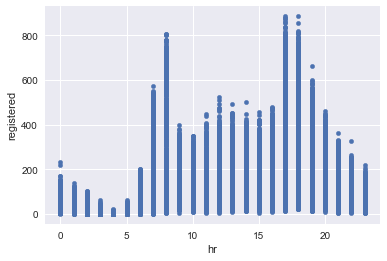

In [207]:
bikemodel_data_final.plot(kind='scatter',x='hr',y='registered')

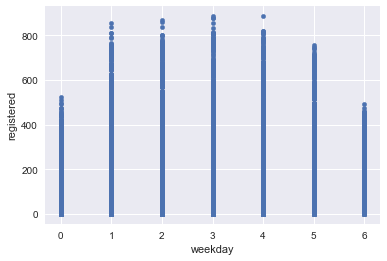

In [209]:
bikemodel_data_final.plot(kind='scatter',x='weekday',y='registered')

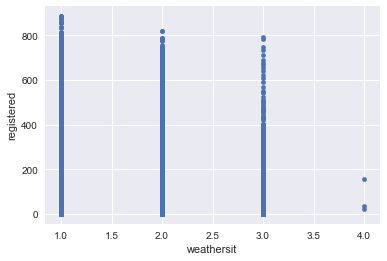

In [210]:
bikemodel_data_final.plot(kind='scatter',x='weathersit',y='registered')

In [280]:
bike_data.corr().round(1)

instant  season   yr  mnth   hr  holiday  weekday  workingday  \
instant         1.0     0.4  0.9   0.5  0.0      0.0      0.0         0.0   
season          0.4     1.0  0.0   0.8  0.0      0.0      0.0         0.0   
yr              0.9     0.0  1.0   0.0  0.0      0.0      0.0         0.0   
mnth            0.5     0.8  0.0   1.0  0.0      0.0      0.0         0.0   
hr              0.0     0.0  0.0   0.0  1.0      0.0      0.0         0.0   
holiday         0.0     0.0  0.0   0.0  0.0      1.0     -0.1        -0.3   
weekday         0.0     0.0  0.0   0.0  0.0     -0.1      1.0         0.0   
workingday      0.0     0.0  0.0   0.0  0.0     -0.3      0.0         1.0   
weathersit      0.0     0.0  0.0   0.0  0.0      0.0      0.0         0.0   
temp            0.1     0.3  0.0   0.2  0.1      0.0      0.0         0.1   
atemp           0.1     0.3  0.0   0.2  0.1      0.0      0.0         0.1   
hum             0.0     0.2 -0.1   0.2 -0.3      0.0      0.0         0.0   
windspeed      -0.1    -0.1  0.0  -0.1  0.1      0.0      0.0         0.0   
casual          0.2     0.1  0.1   0.1  0.3      0.0      0.0        -0.3   
registered      0.3     0.2  0.3   0.1  0.4      0.0      0.0         0.1   
cnt             0.3     0.2  0.3   0.1  0.4      0.0      0.0         0.0   

            weathersit  temp  atemp  hum  windspeed  casual  registered  cnt  
instant            0.0   0.1    0.1  0.0       -0.1     0.2         0.3  0.3  
season             0.0   0.3    0.3  0.2       -0.1     0.1         0.2  0.2  
yr                 0.0   0.0    0.0 -0.1        0.0     0.1         0.3  0.3  
mnth               0.0   0.2    0.2  0.2       -0.1     0.1         0.1  0.1  
hr                 0.0   0.1    0.1 -0.3        0.1     0.3         0.4  0.4  
holiday            0.0   0.0    0.0  0.0        0.0     0.0         0.0  0.0  
weekday            0.0   0.0    0.0  0.0        0.0     0.0         0.0  0.0  
workingday         0.0   0.1    0.1  0.0        0.0    -0.3         0.1  0.0  
weathersit         1.0  -0.1   -0.1  0.4        0.0    -0.2        -0.1 -0.1  
temp              -0.1   1.0    1.0 -0.1        0.0     0.5         0.3  0.4  
atemp             -0.1   1.0    1.0 -0.1       -0.1     0.5         0.3  0.4  
hum                0.4  -0.1   -0.1  1.0       -0.3    -0.3        -0.3 -0.3  
windspeed          0.0   0.0   -0.1 -0.3        1.0     0.1         0.1  0.1  
casual            -0.2   0.5    0.5 -0.3        0.1     1.0         0.5  0.7  
registered        -0.1   0.3    0.3 -0.3        0.1     0.5         1.0  1.0  
cnt               -0.1   0.4    0.4 -0.3        0.1     0.7         1.0  1.0

Axes(0.125,0.125;0.62x0.755)


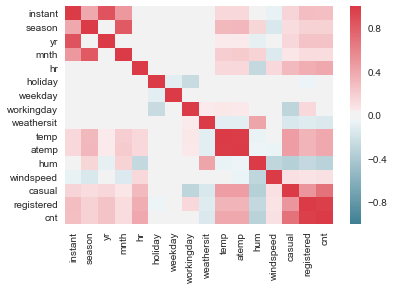

In [315]:
print sns.heatmap(bike_data.corr(), cmap=cmap)

In [326]:
bike_data.corr().round(1)['registered'].order()

C:\Users\Andrew\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


hum          -0.3
weathersit   -0.1
holiday       0.0
weekday       0.0
mnth          0.1
workingday    0.1
windspeed     0.1
season        0.2
instant       0.3
yr            0.3
temp          0.3
atemp         0.3
hr            0.4
casual        0.5
registered    1.0
cnt           1.0
Name: registered, dtype: float64

In [235]:
bike_data.groupby(['holiday','workingday']).mean()[['casual','registered']].round()

casual  registered
holiday workingday                    
0       0             59.0       125.0
        1             26.0       168.0
1       0             45.0       112.0

In [236]:
bike_data.groupby(['weekday']).mean()[['casual','registered']].round()

casual  registered
weekday                    
0          56.0       121.0
1          29.0       155.0
2          24.0       168.0
3          23.0       168.0
4          25.0       172.0
5          31.0       165.0
6          61.0       129.0

In [229]:
bike_data.groupby(['hr']).mean()[['casual','registered']].round()

casual  registered
hr                    
0     10.0        44.0
1      7.0        27.0
2      5.0        18.0
3      3.0         9.0
4      1.0         5.0
5      1.0        18.0
6      4.0        72.0
7     11.0       201.0
8     22.0       337.0
9     31.0       188.0
10    46.0       127.0
11    60.0       149.0
12    68.0       185.0
13    72.0       181.0
14    76.0       165.0
15    75.0       176.0
16    74.0       238.0
17    74.0       387.0
18    61.0       364.0
19    49.0       263.0
20    36.0       190.0
21    28.0       144.0
22    22.0       109.0
23    15.0        73.0

In [232]:
bike_data.groupby(['weathersit']).mean()[['casual','registered']].round()

casual  registered
weathersit                    
1             41.0       164.0
2             30.0       146.0
3             16.0        96.0
4              3.0        72.0

In [238]:
bike_data.groupby(['mnth']).mean()[['casual','registered']].round()

casual  registered
mnth                    
1        8.0        86.0
2       11.0       102.0
3       30.0       125.0
4       42.0       145.0
5       51.0       172.0
6       51.0       189.0
7       53.0       179.0
8       49.0       189.0
9       49.0       192.0
10      41.0       181.0
11      25.0       152.0
12      15.0       128.0

In [239]:
bike_data.groupby(['season']).mean()[['casual','registered']].round()

casual  registered
season                    
1         14.0        97.0
2         46.0       162.0
3         50.0       186.0
4         31.0       168.0

In [255]:
month   = pd.get_dummies(bike_data['mnth'],prefix='month')
hour    = pd.get_dummies(bike_data['hr'],prefix='hour')
weekday = pd.get_dummies(bike_data['weekday'], prefix='weekday', prefix_sep="_")
weather = pd.get_dummies(bike_data['weathersit'], prefix='weather')

bikemodel_data_reg = bike_data.join(month)#.iloc[:,1:])#,hour.iloc[:,1:],weekday.iloc[:,1:],weather.iloc[:,1:])
bikemodel_data_reg = bikemodel_data_reg.join(hour)
bikemodel_data_reg = bikemodel_data_reg.join(weekday)
bikemodel_data_reg = bikemodel_data_reg.join(weather)

bikemodel_data_reg.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit    ...      weekday_1  weekday_2  weekday_3  weekday_4  \
0           1    ...              0          0          0          0   
1           1    ...              0          0          0          0   
2           1    ...              0          0          0          0   
3           1    ...              0          0          0          0   
4           1    ...              0          0          0          0   

   weekday_5  weekday_6  weather_1  weather_2  weather_3  weather_4  
0          0          1          1          0          0          0  
1          0          1          1          0          0          0  
2          0          1          1          0          0          0  
3          0          1          1          0          0          0  
4          0          1          1          0          0          0  

[5 rows x 64 columns]

In [269]:
z = bike_data['registered']
log_z = np.log10(z+1)

In [267]:
# WITHOUT log-transform, R-squared=0.533

lm = smf.ols(formula='z ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + workingday + weekday_1 + weekday_2 + weekday_3 + weekday_4 + weekday_5 + weekday_6 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data_reg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     430.0
Date:                Wed, 17 May 2017   Prob (F-statistic):               0.00
Time:                        22:36:56   Log-Likelihood:            -1.0528e+05
No. Observations:               17379   AIC:                         2.107e+05
Df Residuals:                   17332   BIC:                         2.110e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    148.6743     60.404      2.461      0.014        30.276   267.073
temp         275.3110      9.324     29.527      0.000       257.035   293.587
hum         -129.6733      5.530    -23.447      0.000      -140.514  -118.833
windspeed    -18.2878      6.942     -2.634      0.008       -31.895    -4.681
weather_1      9.0466     59.951      0.151      0.880      -108.463   126.557
weather_2     10.0849     59.943      0.168      0.866      -107.410   127.579
weather_3    -25.2063     59.970     -0.420      0.674      -142.753    92.340
month_1      -28.9948      3.957     -7.328      0.000       -36.750   -21.239
month_2      -33.3716      3.948     -8.452      0.000       -41.110   -25.633
month_3      -33.7791      3.887     -8.690      0.000       -41.398   -26.160
month_4      -31.3280      4.095     -7.651      0.000       -39.354   -23.302
month_5      -27.1577      4.568     -5.945      0.000       -36.112   -18.204
month_6      -52.5593      5.112    -10.281      0.000       -62.580   -42.539
month_7      -76.9606      5.547    -13.873      0.000       -87.834   -66.087
month_8      -52.6774      5.240    -10.053      0.000       -62.948   -42.406
month_9       -9.6580      4.720     -2.046      0.041       -18.910    -0.406
month_10      12.1662      4.123      2.951      0.003         4.085    20.247
month_11       6.7255      3.867      1.739      0.082        -0.854    14.305
workingday    56.0786      4.945     11.341      0.000        46.386    65.771
weekday_1    -16.4093      5.154     -3.184      0.001       -26.512    -6.306
weekday_2    -13.6498      5.722     -2.385      0.017       -24.866    -2.434
weekday_3    -11.2184      5.714     -1.963      0.050       -22.418    -0.018
weekday_4    -13.4420      5.677     -2.368      0.018       -24.569    -2.315
weekday_5    -16.3917      5.669     -2.891      0.004       -27.504    -5.280
weekday_6      7.6594      2.928      2.616      0.009         1.920    13.399
hour_1      -162.6367      4.768    -34.109      0.000      -171.983  -153.291
hour_2      -168.3963      4.801    -35.074      0.000      -177.807  -158.986
hour_3      -175.1543      4.857    -36.066      0.000      -184.674  -165.635
hour_4      -175.5886      4.872    -36.042      0.000      -185.138  -166.039
hour_5      -160.4269      4.839    -33.155      0.000      -169.911  -150.943
hour_6      -105.1733      4.821    -21.813      0.000      -114.624   -95.723
hour_7        21.3448      4.794      4.452      0.000        11.948    30.742
hour_8       149.2734      4.760     31.357      0.000       139.942   158.604
hour_9       -10.8798      4.727     -2.302      0.021       -20.144    -1.615
hour_10      -84.4198      4.708    -17.931      0.000       -93.648   -75.192
hour_11      -75.0533      4.712    -15.929      0.000       -84.289   -65.818
ho

In [281]:
# WITH log-transform, R-squared=0.737

lm = smf.ols(formula='log_z ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + workingday + weekday_1 + weekday_2 + weekday_3 + weekday_4 + weekday_5 + weekday_6 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data_reg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_z   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1056.
Date:                Wed, 17 May 2017   Prob (F-statistic):               0.00
Time:                        23:06:11   Log-Likelihood:                -4381.8
No. Observations:               17379   AIC:                             8858.
Df Residuals:                   17332   BIC:                             9222.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9335      0.182     10.634      0.000         1.577     2.290
temp           0.8813      0.028     31.398      0.000         0.826     0.936
hum           -0.3191      0.017    -19.170      0.000        -0.352    -0.287
windspeed     -0.0825      0.021     -3.950      0.000        -0.124    -0.042
weather_1     -0.1114      0.180     -0.617      0.537        -0.465     0.242
weather_2     -0.1026      0.180     -0.568      0.570        -0.456     0.251
weather_3     -0.2861      0.181     -1.585      0.113        -0.640     0.068
month_1       -0.1219      0.012    -10.235      0.000        -0.145    -0.099
month_2       -0.1059      0.012     -8.912      0.000        -0.129    -0.083
month_3       -0.1189      0.012    -10.160      0.000        -0.142    -0.096
month_4       -0.0898      0.012     -7.282      0.000        -0.114    -0.066
month_5       -0.0579      0.014     -4.213      0.000        -0.085    -0.031
month_6       -0.1325      0.015     -8.608      0.000        -0.163    -0.102
month_7       -0.2014      0.017    -12.060      0.000        -0.234    -0.169
month_8       -0.1462      0.016     -9.271      0.000        -0.177    -0.115
month_9       -0.0336      0.014     -2.365      0.018        -0.061    -0.006
month_10       0.0470      0.012      3.790      0.000         0.023     0.071
month_11       0.0527      0.012      4.527      0.000         0.030     0.076
workingday     0.1516      0.015     10.184      0.000         0.122     0.181
weekday_1     -0.1091      0.016     -7.029      0.000        -0.139    -0.079
weekday_2     -0.1103      0.017     -6.403      0.000        -0.144    -0.077
weekday_3     -0.0971      0.017     -5.644      0.000        -0.131    -0.063
weekday_4     -0.0856      0.017     -5.007      0.000        -0.119    -0.052
weekday_5     -0.0557      0.017     -3.266      0.001        -0.089    -0.022
weekday_6      0.0387      0.009      4.393      0.000         0.021     0.056
hour_1        -0.6855      0.014    -47.758      0.000        -0.714    -0.657
hour_2        -0.8910      0.014    -61.652      0.000        -0.919    -0.863
hour_3        -1.0951      0.015    -74.911      0.000        -1.124    -1.066
hour_4        -1.1985      0.015    -81.723      0.000        -1.227    -1.170
hour_5        -0.7483      0.015    -51.378      0.000        -0.777    -0.720
hour_6        -0.2464      0.015    -16.979      0.000        -0.275    -0.218
hour_7         0.1626      0.014     11.266      0.000         0.134     0.191
hour_8         0.4231      0.014     29.522      0.000         0.395     0.451
hour_9         0.2447      0.014     17.200      0.000         0.217     0.273
hour_10        0.0388      0.014      2.738      0.006         0.011     0.067
hour_11        0.0658      0.014      4.640      0.000         0.038     0.094
ho

In [289]:
# Taking out weather, R-squared=0.732

lm = smf.ols(formula='log_z ~ temp + hum + windspeed + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + workingday + weekday_1 + weekday_2 + weekday_3 + weekday_4 + weekday_5 + weekday_6 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data_reg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_z   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1099.
Date:                Wed, 17 May 2017   Prob (F-statistic):               0.00
Time:                        23:11:18   Log-Likelihood:                -4562.7
No. Observations:               17379   AIC:                             9213.
Df Residuals:                   17335   BIC:                             9555.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8756      0.019     97.147      0.000         1.838     1.913
temp           0.9172      0.028     32.422      0.000         0.862     0.973
hum           -0.4223      0.015    -28.648      0.000        -0.451    -0.393
windspeed     -0.1411      0.021     -6.764      0.000        -0.182    -0.100
month_1       -0.1238      0.012    -10.298      0.000        -0.147    -0.100
month_2       -0.1160      0.012     -9.670      0.000        -0.140    -0.092
month_3       -0.1266      0.012    -10.716      0.000        -0.150    -0.103
month_4       -0.1025      0.012     -8.242      0.000        -0.127    -0.078
month_5       -0.0671      0.014     -4.835      0.000        -0.094    -0.040
month_6       -0.1488      0.016     -9.597      0.000        -0.179    -0.118
month_7       -0.2182      0.017    -12.973      0.000        -0.251    -0.185
month_8       -0.1593      0.016    -10.022      0.000        -0.190    -0.128
month_9       -0.0425      0.014     -2.966      0.003        -0.071    -0.014
month_10       0.0384      0.013      3.065      0.002         0.014     0.063
month_11       0.0496      0.012      4.219      0.000         0.027     0.073
workingday     0.1484      0.015      9.869      0.000         0.119     0.178
weekday_1     -0.1055      0.016     -6.729      0.000        -0.136    -0.075
weekday_2     -0.1110      0.017     -6.381      0.000        -0.145    -0.077
weekday_3     -0.1016      0.017     -5.845      0.000        -0.136    -0.068
weekday_4     -0.0855      0.017     -4.954      0.000        -0.119    -0.052
weekday_5     -0.0553      0.017     -3.206      0.001        -0.089    -0.021
weekday_6      0.0373      0.009      4.188      0.000         0.020     0.055
hour_1        -0.6727      0.014    -46.465      0.000        -0.701    -0.644
hour_2        -0.8777      0.015    -60.215      0.000        -0.906    -0.849
hour_3        -1.0802      0.015    -73.276      0.000        -1.109    -1.051
hour_4        -1.1827      0.015    -80.007      0.000        -1.212    -1.154
hour_5        -0.7299      0.015    -49.735      0.000        -0.759    -0.701
hour_6        -0.2285      0.015    -15.622      0.000        -0.257    -0.200
hour_7         0.1756      0.015     12.062      0.000         0.147     0.204
hour_8         0.4364      0.014     30.180      0.000         0.408     0.465
hour_9         0.2551      0.014     17.760      0.000         0.227     0.283
hour_10        0.0443      0.014      3.096      0.002         0.016     0.072
hour_11        0.0677      0.014      4.729      0.000         0.040     0.096
hour_12        0.1380      0.014      9.617      0.000         0.110     0.166
hour_13        0.1076      0.014      7.471      0.000         0.079     0.136
hour_14        0.0506      0.014      3.502      0.000         0.022     0.079
ho

In [329]:
# Hour alone explains 65% of variances
lm = smf.ols(formula='log_z ~ hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data_reg).fit()
round(lm.rsquared,3)

0.651

In [340]:
# Without hour R-squared is only 26%
lm = smf.ols(formula='log_z ~ temp + hum + windspeed + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + workingday + weekday_1 + weekday_2 + weekday_3 + weekday_4 + weekday_5 + weekday_6', data=bikemodel_data_reg).fit()
round(lm.rsquared,3)

0.263

In [336]:
# Use GLS, same result
lm = smf.gls(formula='log_z ~ temp + hum + windspeed + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + workingday + weekday_1 + weekday_2 + weekday_3 + weekday_4 + weekday_5 + weekday_6', data=bikemodel_data_reg).fit()
round(lm.rsquared,3)

0.263